# **Experiment Notebook**



In [1]:
!pip install --upgrade pip
!pip install pandas==2.2.2 scikit-learn==1.5.2 numpy==1.26.4
!pip install imbalanced-learn==0.12.3 umap-learn==0.5.5 seaborn==0.13.2
!pip install custom_package_25731542 utstd


In [2]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [3]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [4]:
# <Student to fill this section>
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import custom_package_25731542 as cp
from utstd.ipyrenders import print_tile
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## A. Project Description


In [5]:
# <Student to fill this section>
student_name = "Rohan Chaudhary"
student_id = "25731542"

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [7]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [8]:
# <Student to fill this section>
business_use_case_description = """
The goal is to provide accurate precipitation forecasts to enable proactive decision-making for businesses dependent on weather conditions. Early knowledge of rain events can prevent losses, optimize outdoor scheduling, and improve resource allocation.
"""

In [9]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [10]:
# <Student to fill this section>
business_objectives = """
Accurate Predictions: Enable operations teams to take preventive measures.
Incorrect Predictions: Over-forecasting rain may lead to unnecessary precautions, while under-forecasting may cause operational disruptions.
"""

In [11]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [12]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
Users: Weather-sensitive industries and internal planning teams.
Impact: Accurate predictions improve operational efficiency and customer satisfaction. Poor predictions may result in financial losses or operational delays.
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [14]:
# <Student to fill this section>
file_path = "/content/drive/MyDrive/36106/part1.csv"
data = pd.read_csv(file_path)

# Clean column names (safe normalization)
data.columns = [c.strip().replace(" ","_").replace("(","").replace(")","")
                .replace("%","").replace("°C","").replace("mm","") for c in data.columns]

print("Cleaned Columns:", data.columns.tolist())
print("Dataset Shape:", data.shape)
display(data.head())

### Convert Time & Add Temporal Features
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['day'] = data['time'].dt.day
data['month'] = data['time'].dt.month
data['weekday'] = data['time'].dt.weekday
data['year'] = data['time'].dt.year

cp.print_eda(data)

Cleaned Columns: ['time', 'temperature_2m_', 'relative_humidity_2m_', 'dew_point_2m_', 'apparent_temperature_', 'cloud_cover_', 'surface_pressure_hPa', 'wind_speed_100m_km/h', 'wind_gusts_10m_km/h', 'vapour_pressure_deficit_kPa', 'precipitation_', 'rain_']
Dataset Shape: (35064, 12)


,time,temperature_2m_,relative_humidity_2m_,dew_point_2m_,apparent_temperature_,cloud_cover_,surface_pressure_hPa,wind_speed_100m_km/h,wind_gusts_10m_km/h,vapour_pressure_deficit_kPa,precipitation_,rain_
0,2021-01-01T00:00,21.2,66,14.7,20.1,100,1015.1,24.7,43.6,0.85,0.1,0.1
1,2021-01-01T01:00,21.3,65,14.4,20.4,98,1015.1,24.5,40.0,0.90,0.0,0.0
2,2021-01-01T02:00,20.9,65,14.2,19.5,97,1014.6,25.5,40.0,0.86,0.0,0.0
3,2021-01-01T03:00,21.3,63,14.0,19.9,100,1014.3,24.5,40.3,0.93,0.0,0.0
4,2021-01-01T04:00,20.8,63,13.4,19.4,100,1014.1,23.5,38.9,0.91,0.1,0.1


===== SHAPE =====
(35064, 17)

===== INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   time                         35064 non-null  datetime64[ns]
 1   temperature_2m_              35064 non-null  float64       
 2   relative_humidity_2m_        35064 non-null  int64         
 3   dew_point_2m_                35064 non-null  float64       
 4   apparent_temperature_        35064 non-null  float64       
 5   cloud_cover_                 35064 non-null  int64         
 6   surface_pressure_hPa         35064 non-null  float64       
 7   wind_speed_100m_km/h         35064 non-null  float64       
 8   wind_gusts_10m_km/h          35064 non-null  float64       
 9   vapour_pressure_deficit_kPa  35064 non-null  float64       
 10  precipitation_               35064 non-null  float64      

### C.2 Define Target variable

In [15]:
# <Student to fill this section>
target_definition_explanations = """
We define the target variable as the 3-day cumulative precipitation (precip_3d) to capture short-term rainfall trends, which aligns with operational decision-making timelines for businesses."""

In [16]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [17]:
# <Student to fill this section>

y_reg = data['precipitation_'].rolling(3, min_periods=1).sum().shift(-2).fillna(0)
data['precip_3d'] = y_reg

target_name = 'precip_3d'

print("Target created. Examples:")
display(data[['time', 'precipitation_', 'precip_3d']].head(8))


Target created. Examples:


,time,precipitation_,precip_3d
0,2021-01-01 00:00:00,0.1,0.1
1,2021-01-01 01:00:00,0.0,0.0
2,2021-01-01 02:00:00,0.0,0.1
3,2021-01-01 03:00:00,0.0,0.1
4,2021-01-01 04:00:00,0.1,0.2
5,2021-01-01 05:00:00,0.0,0.2
6,2021-01-01 06:00:00,0.1,0.3
7,2021-01-01 07:00:00,0.1,0.8


### C.4 Explore Target variable

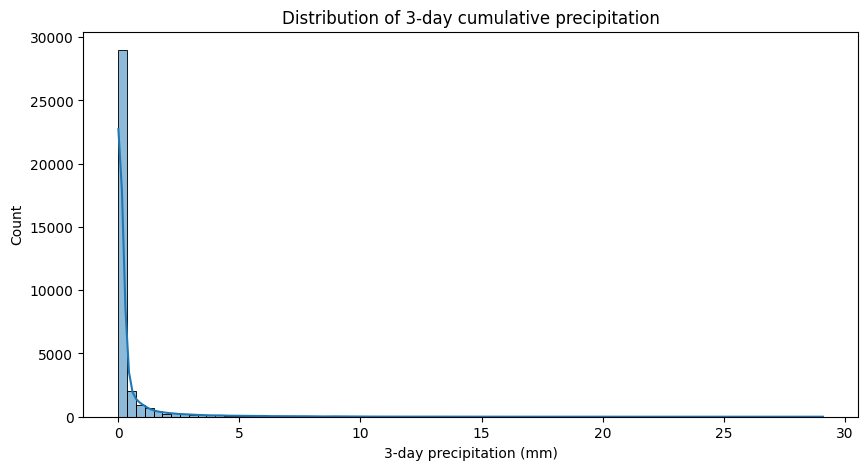

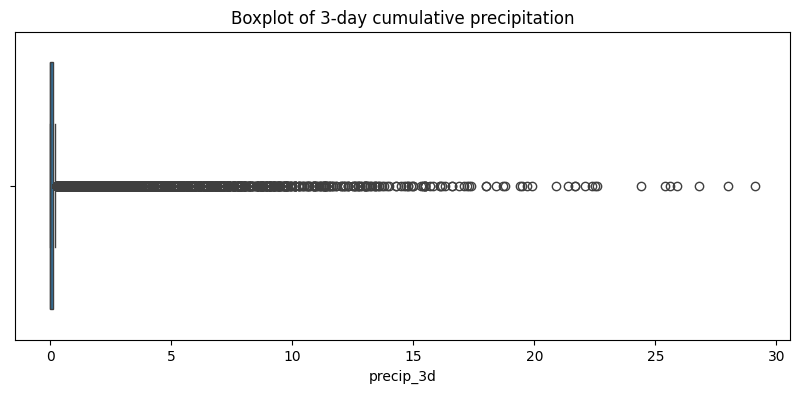

Target summary:


,precip_3d
count,35064.000000
mean,0.398968
std,1.416944
min,0.000000
25%,0.000000
50%,0.000000
75%,0.100000
max,29.100000


In [18]:
plt.figure(figsize=(10,5))
sns.histplot(data[target_name], bins=80, kde=True)
plt.title("Distribution of 3-day cumulative precipitation")
plt.xlabel("3-day precipitation (mm)")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x=data[target_name])
plt.title("Boxplot of 3-day cumulative precipitation")
plt.show()

print("Target summary:")
display(data[target_name].describe())

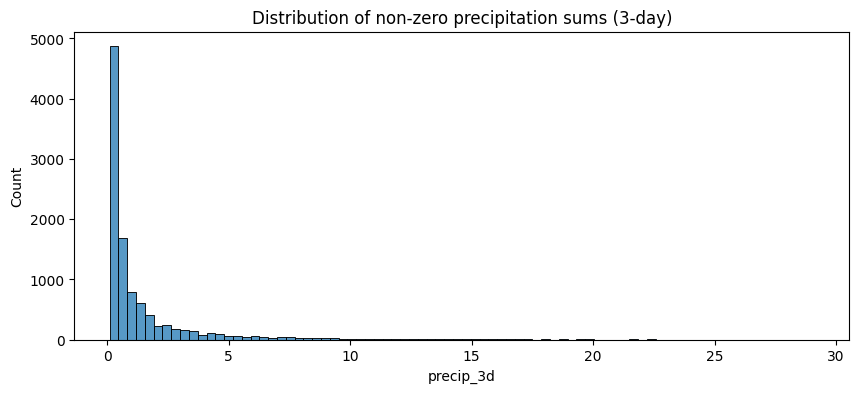

In [19]:
plt.figure(figsize=(10,4))
sns.histplot(data[data[target_name] > 0][target_name], bins=80, kde=False)
plt.title("Distribution of non-zero precipitation sums (3-day)")
plt.show()

In [20]:
# <Student to fill this section>
target_distribution_explanations = """
The target distribution is highly skewed, with many zero-precipitation events and a few high-rainfall events. This indicates potential challenges for regression models, particularly in predicting extreme precipitation values."""

In [21]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest Numericals

In [22]:
# Numerical columns
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
# drop time-like/date columns from num_cols for plotting convenience
num_cols = [c for c in num_cols if c not in ['year']]

<Figure size 1400x1000 with 0 Axes>

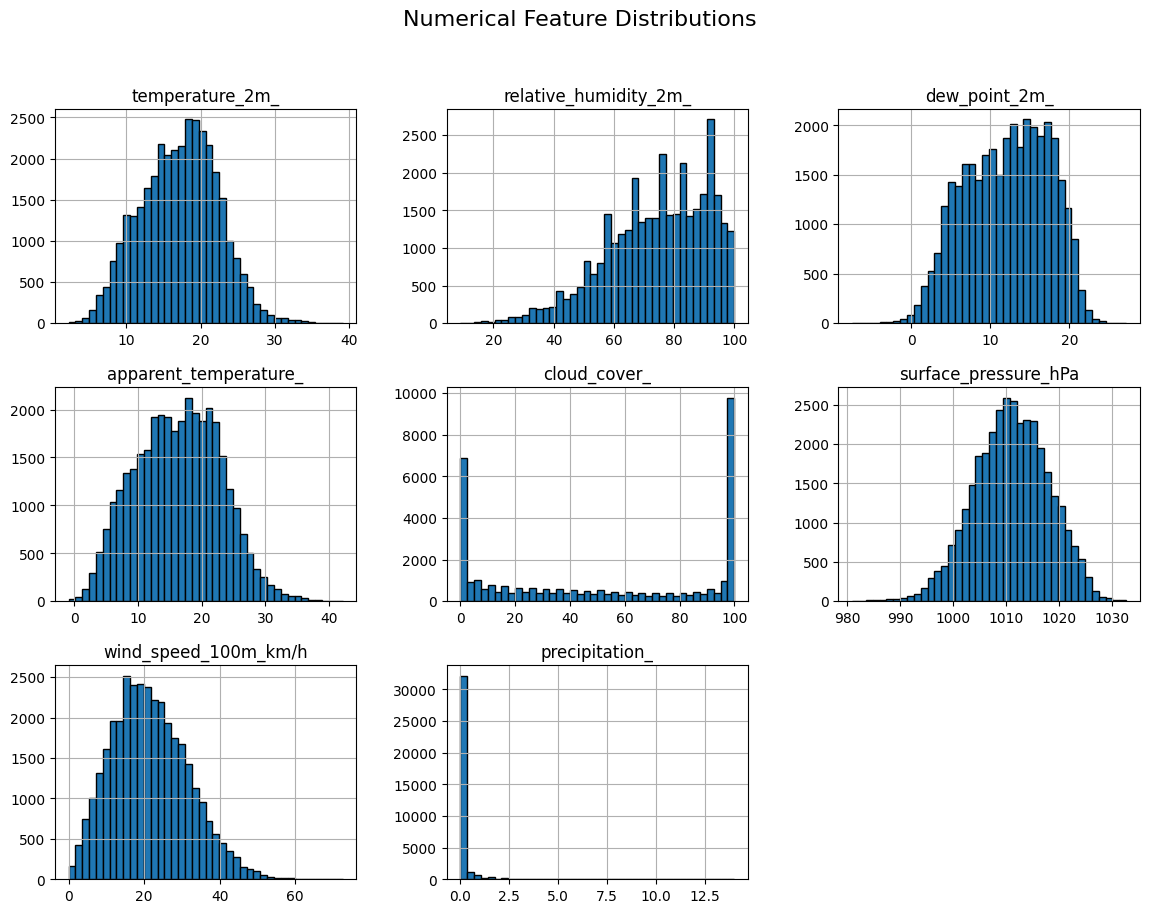

In [23]:
# Distribution plots for core numerical features
core_num = [
    'temperature_2m_','relative_humidity_2m_','dew_point_2m_','apparent_temperature_',
    'cloud_cover_','surface_pressure_hPa','wind_speed_100m_km/h','precipitation_'
]
core_num = [c for c in core_num if c in data.columns]

plt.figure(figsize=(14,10))
data[core_num].hist(bins=40, edgecolor='black', figsize=(14,10))
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.show()

In [24]:
# <Student to fill this section>
feature_1_insights = """
Distribution: Histograms reveal most temperature readings are clustered around 15–25°C.
Skewness: Minimal, suitable for direct use in models.
Limitations: Outliers may occur during heatwaves or cold snaps."""

In [25]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest precipitation

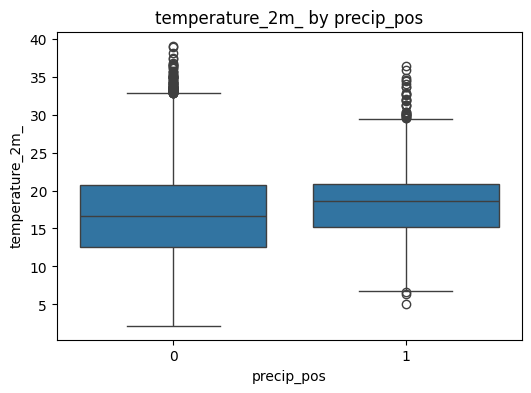

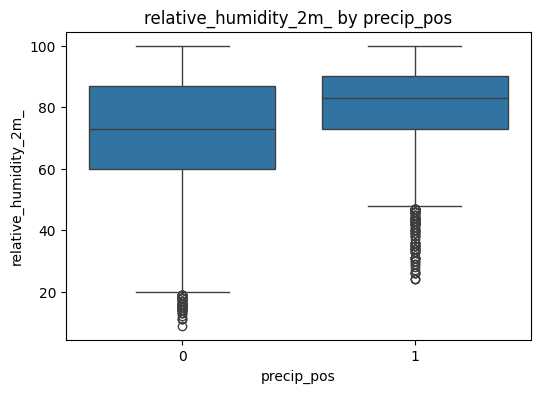

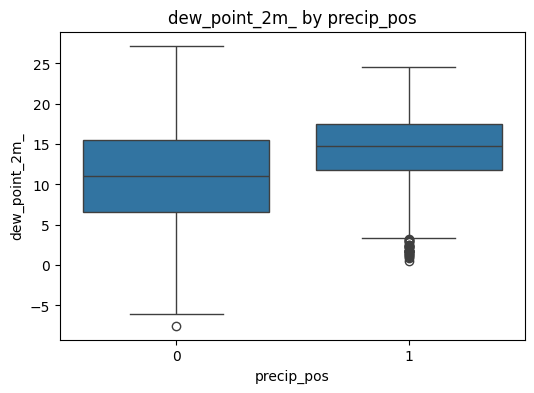

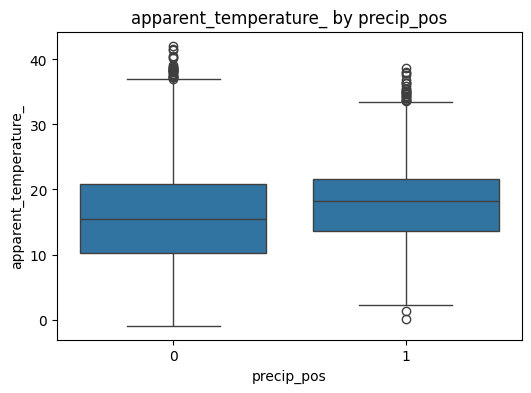

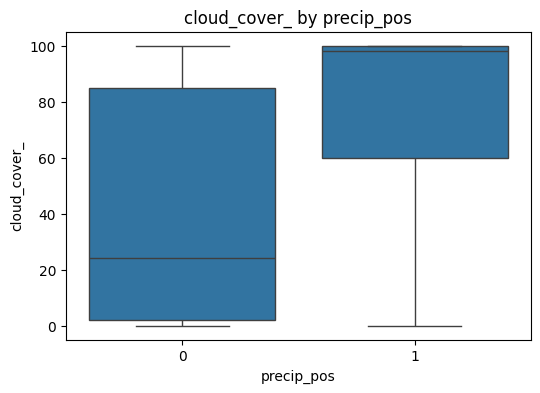

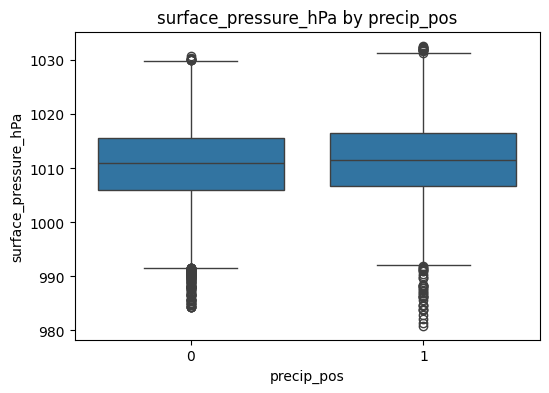

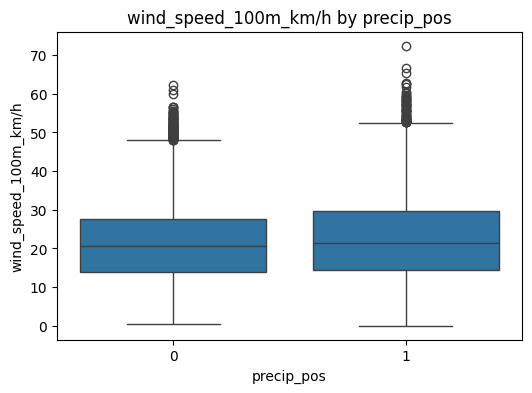

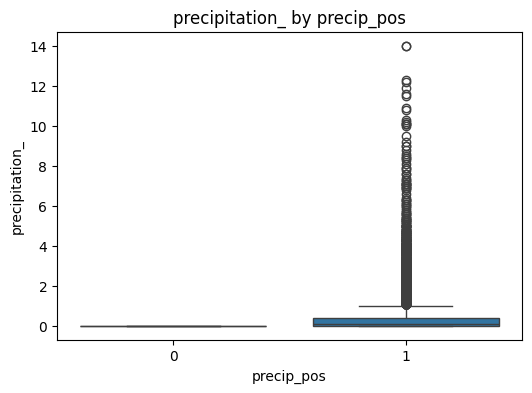

In [26]:
# <Student to fill this section>
# Boxplots vs target (grouped by 0/positive precipitation)
data['precip_pos'] = (data[target_name] > 0).astype(int)
for c in core_num:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='precip_pos', y=c, data=data)
    plt.title(f"{c} by precip_pos")
    plt.show()

In [27]:
# <Student to fill this section>
feature_2_insights = """
Relationship with precipitation: Higher humidity generally correlates with increased precipitation.
Visualization: Boxplots vs precip_pos (0 vs >0) show distinct separation, confirming predictive relevance."""

In [28]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.6 Explore Feature of Interest - temp, humidity, surface pressure etc


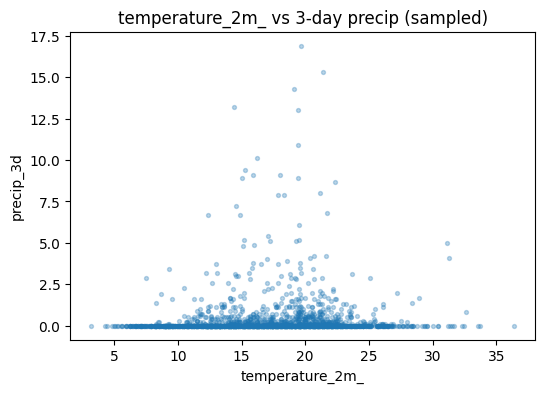

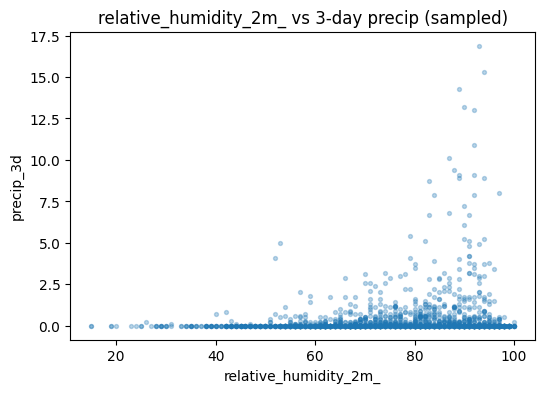

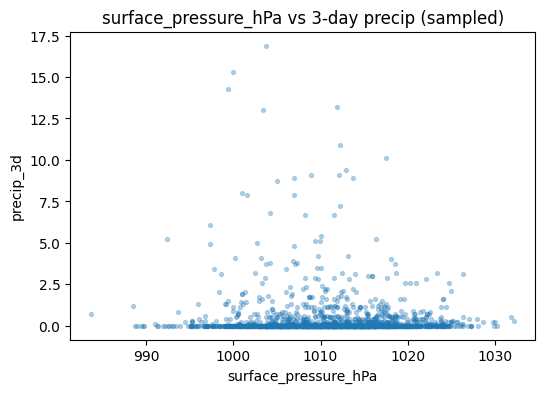

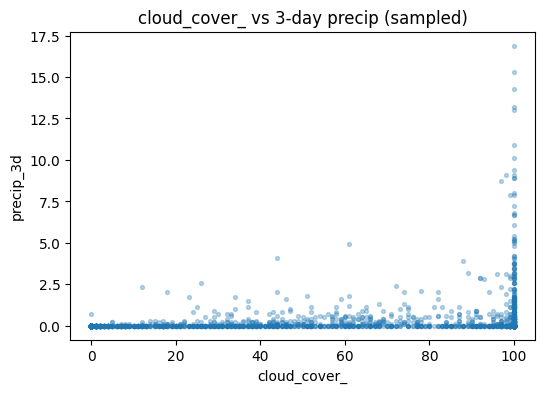

In [29]:
# Scatter y vs interesting features (sample for speed)
sample = data.sample(min(2000, len(data)), random_state=42)
for c in ['temperature_2m_','relative_humidity_2m_','surface_pressure_hPa','cloud_cover_']:
    if c in sample.columns:
        plt.figure(figsize=(6,4))
        plt.scatter(sample[c], sample[target_name], alpha=0.3, s=8)
        plt.xlabel(c)
        plt.ylabel('precip_3d')
        plt.title(f"{c} vs 3-day precip (sampled)")
        plt.show()

In [30]:
# <Student to fill this section>
feature_n_insights = """
Insights: Lower pressure values often precede rain events.
Scatter plots vs target: Helps identify non-linear trends for feature engineering."""

In [31]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

---
## D. Feature Selection


### D.1 Approach correlation heatmap


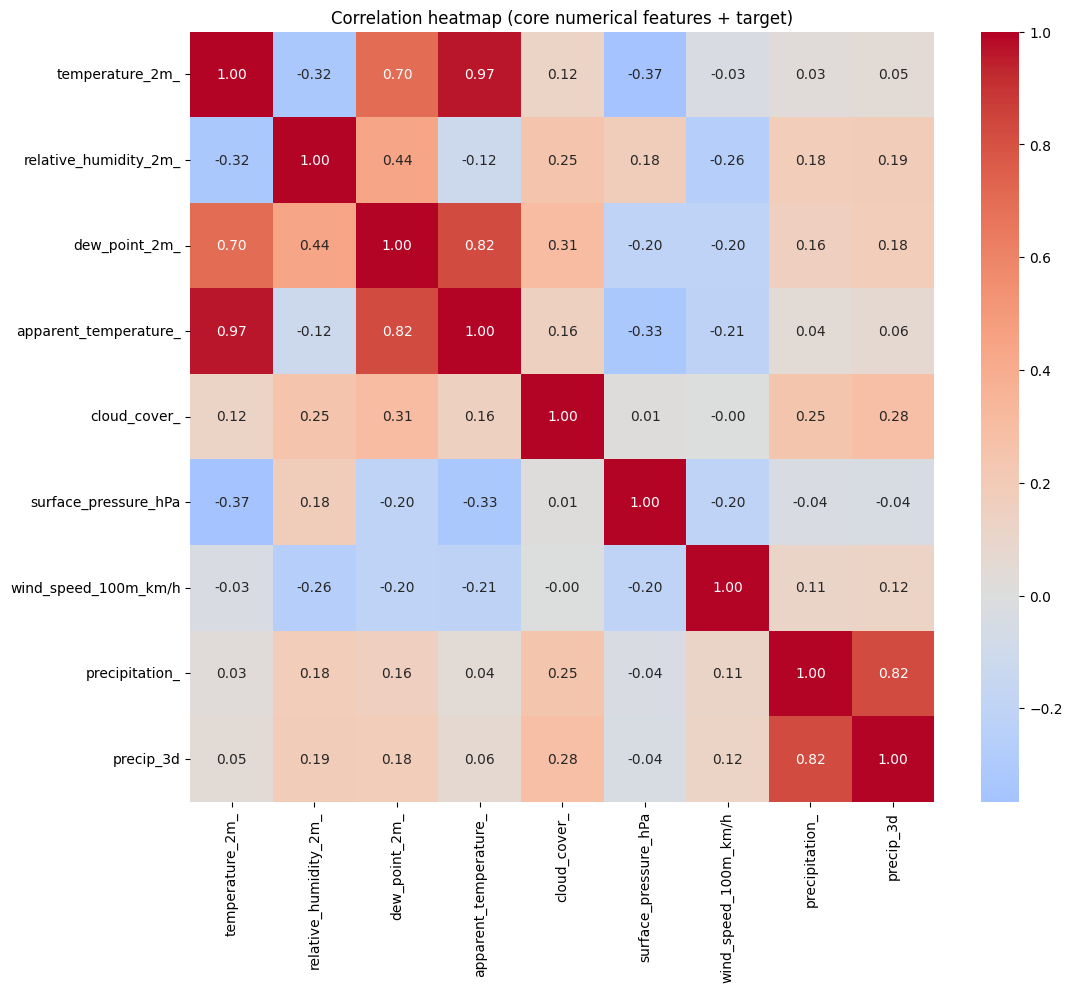

In [32]:
plt.figure(figsize=(12,10))
corr = data[core_num + ['precip_3d']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation heatmap (core numerical features + target)")
plt.show()

In [33]:
# <Student to fill this section>
feature_selection_1_insights = """
Checked correlations between numerical features and precip_3d.
Redundant features with high mutual correlation were considered for removal to avoid multicollinearity."""

In [34]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach Mutual information


In [35]:
X_num = data[core_num].fillna(0)
mi = mutual_info_regression(X_num, data[target_name].fillna(0))
mi_df = pd.DataFrame({"Feature": X_num.columns, "MI Score": mi}).sort_values(by="MI Score", ascending=False)
print("Mutual Information (numeric features):")
display(mi_df)

Mutual Information (numeric features):


,Feature,MI Score
7,precipitation_,0.504781
4,cloud_cover_,0.172767
1,relative_humidity_2m_,0.083879
2,dew_point_2m_,0.075951
0,temperature_2m_,0.036804
3,apparent_temperature_,0.023626
5,surface_pressure_hPa,0.019453
6,wind_speed_100m_km/h,0.015310


In [36]:
# <Student to fill this section>
feature_selection_2_insights = """
Computed mutual information between each numerical feature and target.
Identified features providing the highest predictive power for rainfall."""

In [37]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

## D.z Final Selection of Features

In [38]:
# <Student to fill this section>

features_list = [
    'temperature_2m_','relative_humidity_2m_','dew_point_2m_','apparent_temperature_',
    'cloud_cover_','surface_pressure_hPa','wind_speed_100m_km/h','wind_gusts_10m_km/h',
    'vapour_pressure_deficit_kPa','hour','day','month','weekday'
]

In [39]:
# <Student to fill this section>
feature_selection_explanations = """
Selected features balance predictive strength and interpretability, including both atmospheric and temporal indicators of precipitation.
"""

In [40]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation Missing mean

In [41]:
# Using package to fill missing means
data = cp.fill_missing_mean(data)

In [42]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Missing values can distort models; filling with mean ensures completeness without biasing trends.
"""

In [43]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Data Transformation removing NaN

In [44]:
X = data[features_list + [c for c in data.columns if ('lag' in c or 'roll' in c)]]
y = data[target_name]

In [45]:
print(X.columns)

Index(['temperature_2m_', 'relative_humidity_2m_', 'dew_point_2m_',
       'apparent_temperature_', 'cloud_cover_', 'surface_pressure_hPa',
       'wind_speed_100m_km/h', 'wind_gusts_10m_km/h',
       'vapour_pressure_deficit_kPa', 'hour', 'day', 'month', 'weekday'],
      dtype='object')


In [46]:
# drop rows with NaN in target (if shift produced NAs at end)
mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

In [47]:
# <Student to fill this section>
data_cleaning_2_explanations = """
Ensures models are trained only on complete rows.
"""

In [48]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### E.3 Data Transformation -Scalling

In [51]:
num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object','category']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])


In [52]:
# <Student to fill this section>
data_cleaning_3_explanations = """
Scaling numeric features standardizes ranges, preventing domination of large-valued features.
Categorical features are one-hot encoded for compatibility with regression models."""

In [53]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

---
## F. Feature Engineering

### F.1 New Feature - Lag features

In [54]:
lag_columns = ['temperature_2m_', 'relative_humidity_2m_']

data = cp.create_lag_features(data, lag_columns, lags=[1,3])
data = cp.create_rolling_features(data, lag_columns, windows=[3])

In [55]:
# <Student to fill this section>
feature_engineering_1_explanations = """
Captures temporal dependencies in weather data allowing to train on more in depth information from dataset more efficiently
"""

In [56]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature -Dew diff and wind*cloud




In [57]:
# <Student to fill this section>
# Derived interaction features
if 'temperature_2m_' in data.columns and 'dew_point_2m_' in data.columns:
    data['temp_dew_diff'] = data['temperature_2m_'] - data['dew_point_2m_']
if 'wind_speed_100m_km/h' in data.columns and 'cloud_cover_' in data.columns:
    data['wind_cloud'] = data['wind_speed_100m_km/h'] * data['cloud_cover_']


In [58]:
# <Student to fill this section>
feature_engineering_2_explanations = """
Enhances model ability to capture non-linear relationships between atmospheric variables
"""

In [59]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature - Humid temperature

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [60]:
if 'relative_humidity_2m_' in data.columns and 'temperature_2m_' in data.columns:
    data['humidity_temp_interaction'] = data['relative_humidity_2m_'] * data['temperature_2m_']


In [61]:
# <Student to fill this section>
feature_engineering_n_explanations = """
This feature captures the combined effect of temperature and humidity on precipitation.
It helps the model detect non-linear patterns and improves predictions, especially
during conditions where neither feature alone fully explains rainfall likelihood.
"""

In [62]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_n_explanations)

### F.n Fixing - Combining features

> You can add more cells related to new features in this section

In [63]:
# Update X/X_train/X_test to include new engineered features
X = data[features_list + [c for c in data.columns if ('lag' in c or 'roll' in c or 'interaction' in c or 'diff' in c)]]
X = data[features_list].fillna(0)
# re-apply mask created earlier for rows where y exists
X = X.loc[mask]


In [64]:
# <Student to fill this section>
feature_engineering_n_explanations = """
This step ensures that all engineered features, including lag, rolling statistics,
interaction, and difference features, are incorporated into the modeling dataset.
Filling missing values with 0 prevents model errors and maintains consistency across training, validation, and test sets.
"""

In [65]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_n_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [66]:
# Ensure datetime type
data['time'] = pd.to_datetime(data['time'])

# Define chronological cutoffs
train_end = "2023-12-31"
val_start, val_end = "2024-01-01", "2024-06-30"
test_start, test_end = "2024-07-01", "2024-12-31"

# Select features and target
X = data[features_list + [c for c in data.columns if 'lag' in c or 'roll' in c]]
y = data[target_name]

# Masks for splitting
train_mask = data['time'] <= train_end
val_mask = (data['time'] >= val_start) & (data['time'] <= val_end)
test_mask = (data['time'] >= test_start) & (data['time'] <= test_end)

# Apply masks
X_train, y_train = X[train_mask], y[train_mask]
X_val, y_val = X[val_mask], y[val_mask]
X_test, y_test = X[test_mask], y[test_mask]

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (26257, 19) (26257,)
Validation: (4345, 19) (4345,)
Test: (4393, 19) (4393,)


In [67]:
print(X.columns)

Index(['temperature_2m_', 'relative_humidity_2m_', 'dew_point_2m_',
       'apparent_temperature_', 'cloud_cover_', 'surface_pressure_hPa',
       'wind_speed_100m_km/h', 'wind_gusts_10m_km/h',
       'vapour_pressure_deficit_kPa', 'hour', 'day', 'month', 'weekday',
       'temperature_2m__lag1', 'temperature_2m__lag3',
       'relative_humidity_2m__lag1', 'relative_humidity_2m__lag3',
       'temperature_2m__roll3', 'relative_humidity_2m__roll3'],
      dtype='object')


In [68]:
# <Student to fill this section>
data_splitting_explanations = """
A chronological split is used to mimic real-world forecasting. Training data ends in 2023,
validation covers the first half of 2024, and testing covers the second half.
This ensures the model learns from past data and is evaluated on unseen future periods,
avoiding data leakage and maintaining temporal integrity.
"""

In [69]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation

In [70]:
# Preprocessor must be updated to current numeric/categorical lists
num_features = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

In [71]:
# <Student to fill this section>
data_transformation_1_explanations = """
Separating numeric and categorical features allows applying appropriate transformations
like scaling numeric variables and encoding categorical variables. This ensures that
all features are on comparable scales and machine learning models can interpret them effectively.

"""

In [72]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.3 Data Transformation Scaling

In [73]:
# <Student to fill this section>

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_train_scaled = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

In [75]:
# <Student to fill this section>
data_transformation_2_explanations = """
Scaling numeric features using StandardScaler ensures that all numeric inputs have
zero mean and unit variance, which improves gradient-based model convergence.
Filling missing values with training mean prevents information leakage from test data.
"""

In [76]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

---
## H. Save Datasets

> Do not change this code

In [78]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

name 'at' is not defined


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [80]:
# <Student to fill this section>
performance_metrics_explanations = """
Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
and R-squared (R2) are chosen because they quantify prediction accuracy for regression tasks.
MAE is intuitive, MSE/RMSE penalize large errors, and R2 measures the proportion of variance explained
by the model.
"""

In [81]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [82]:
# <Student to fill this section>
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# <Student to fill this section>
algorithm_selection_explanations = """
Gradient Boosting Regressor is selected for its ability to handle non-linear relationships
and interactions between features. It performs well on structured data and is robust
to feature collinearity and missing values.
"""

In [84]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [85]:
gbr_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [86]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
The number of estimators, learning rate, and maximum depth are tuned to balance bias and variance.
A moderate learning rate and sufficient estimators allow the model to learn complex patterns
without overfitting. Max depth controls the complexity of each tree.
"""

In [87]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [88]:
gbr_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=42)

In [89]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from google.colab import files

# Save the model
joblib.dump(gbr_model, "model.pkl")

# Load the model
loaded_model = joblib.load("model.pkl")

# Download the model (Colab)
files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### J.4 Model Technical Performance

> Provide some explanations on model performance



=== Gradient Boosting Regressor Performance ===
MAE: 5.2168
MSE: 28.8438
RMSE: 5.3706
R2: -29.1591


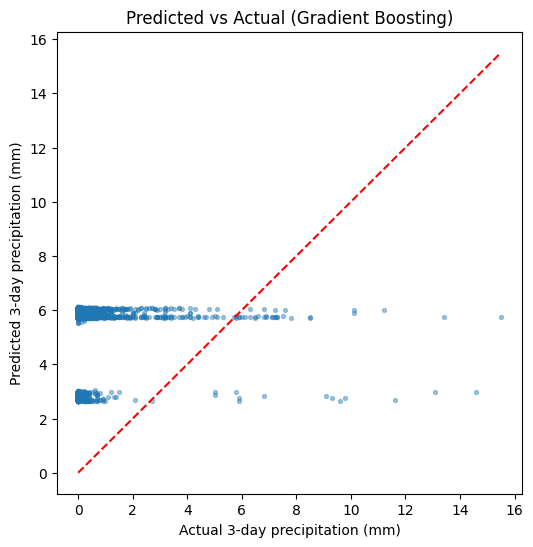

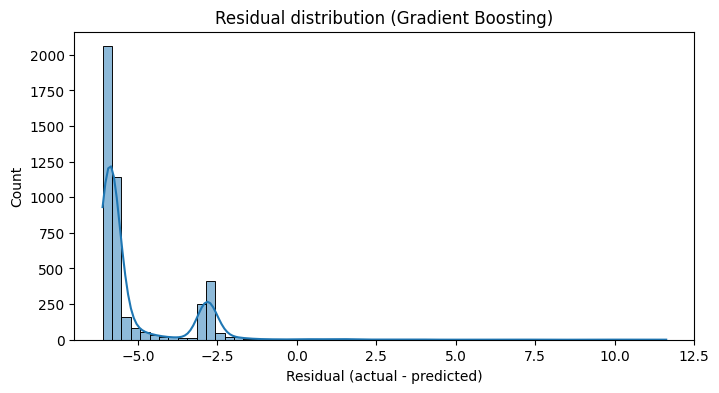

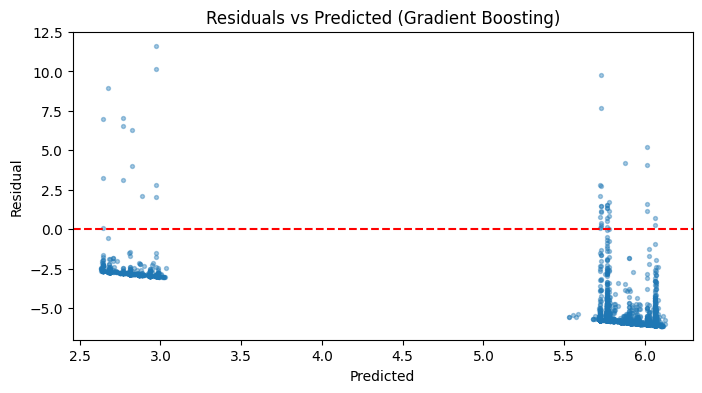

In [92]:
y_pred=gbr_model.predict(X_test_scaled)
metrics = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "MSE": mean_squared_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2": r2_score(y_test, y_pred)
}

print("\n=== Gradient Boosting Regressor Performance ===")
for m, val in metrics.items():
    print(f"{m}: {val:.4f}")

# Scatter predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4, s=8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual 3-day precipitation (mm)")
plt.ylabel("Predicted 3-day precipitation (mm)")
plt.title("Predicted vs Actual (Gradient Boosting)")
plt.show()

# Residuals histogram
residuals = y_test - y_pred
plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=60, kde=True)
plt.title("Residual distribution (Gradient Boosting)")
plt.xlabel("Residual (actual - predicted)")
plt.show()

# Residuals vs predicted
plt.figure(figsize=(8,4))
plt.scatter(y_pred, residuals, alpha=0.4, s=8)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted (Gradient Boosting)")
plt.show()

In [93]:
# <Student to fill this section>
model_performance_explanations = """
The model shows how accurately 3-day cumulative precipitation can be predicted.
Residual plots and histograms help detect patterns in prediction errors.
Small MAE and RMSE with R2 close to 1 indicate good predictive performance.
"""

In [94]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [95]:
# <Student to fill this section>
business_impacts_explanations = """
Accurate precipitation forecasts help businesses optimize operations, such as
scheduling outdoor activities or logistics. Errors in prediction can lead to
resource misallocation or operational delays, so improving model accuracy directly
reduces risk and operational cost.
"""

In [96]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [97]:
# <Student to fill this section>
experiment_outcome = "Hypothesis Partially Confirmed"

In [98]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [99]:
# <Student to fill this section>
experiment_results_explanations = """
The experiment confirms that Gradient Boosting with engineered features improves
precipitation predictions, but some errors remain in extreme weather conditions.
Next steps include testing additional interaction features, hyperparameter tuning,
and exploring ensemble models. If performance meets business thresholds, the model
can be deployed for operational use.
"""

In [100]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)